# Pytorch 練習 - 單車數量預測

In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim

%matplotlib inline

In [2]:
data = pd.read_csv('/Users/suenweixiang/Downloads/book_DeepLearning_in_PyTorch_Source-master/03_bike_predictor/bike-sharing-dataset/hour.csv')
data.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


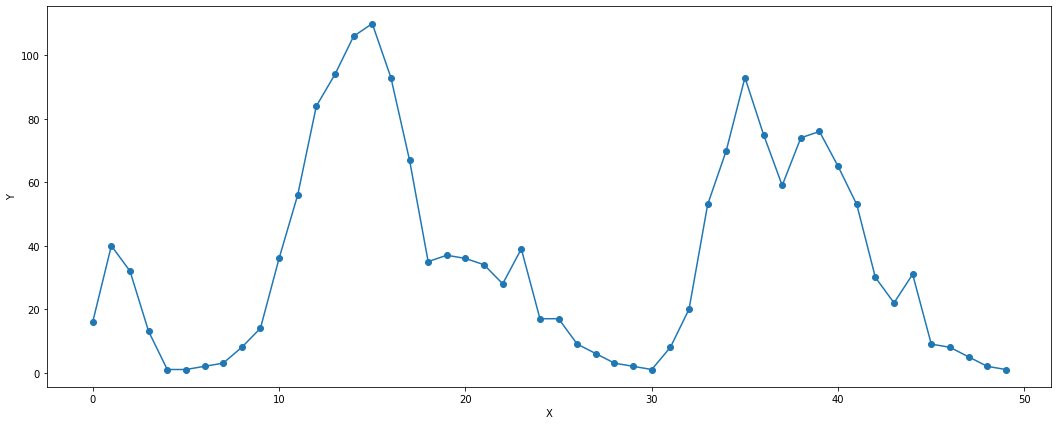

In [4]:
count = data['cnt'][0:50]
x = np.arange(50)
y = np.array(count)
plt.figure(figsize=(18,7))
plt.plot(x,y,"-o")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# 線性回歸

In [ ]:
x = torch.tensor(np.arange(len(count)),dtype=torch.double,requires_grad=True)
y = torch.tensor(np.array(count),dtype=torch.double,requires_grad=True)
a = torch.rand(1,dtype=torch.double,requires_grad=True)
b = torch.rand(1,dtype=torch.double,requires_grad=True)
print("X =",x,'\n',"Y =",y,'\n',"a =",a,'\n',"b =",b)

In [ ]:
lr = 0.00001
for i in range(100_000):
    prediction = a * x + b
    loss = torch.mean((prediction - y) ** 2)

    if i % 1_000 == 0:
        print('loss:',loss)
    loss.backward()
    a.data.add_( -lr * a.grad.data)
    b.data.add_( -lr * b.grad.data)
    a.grad.zero_()
    b.grad.zero_()

In [ ]:
print(x.data.numpy())
print(y.data.numpy())

In [ ]:
plt.figure(figsize=(10,7))
xplot, = plt.plot(x.data,y.data,'-o')
yplot, = plt.plot(x.data,prediction.data)
plt.xlabel("X")
plt.ylabel("Y")
plt.legend([xplot,yplot],["Data",str(a.data.numpy()[0])+"x+"+str(b.data.numpy()[0])])
plt.title("Linear Prediction")
plt.show()

# 簡單神經網路

In [ ]:
x = torch.tensor(np.arange(len(count)),dtype=torch.double,requires_grad=True)
y = torch.tensor(np.array(count),dtype=torch.double,requires_grad=True)
sz = 10
weight = torch.randn((1,sz),dtype=torch.double,requires_grad=True)
biases = torch.randn(sz,dtype=torch.double,requires_grad=True)
weight2 = torch.randn((sz,1),dtype=torch.double,requires_grad=True)
lr = 0.0001
losses = []
x = x.view(len(count),1)
y = y.view(len(count),1)

for i in range(1_000_000):
    hidden = x.mm(weight) + biases
    # print(hidden.size())
    hidden = torch.sigmoid(hidden)
    prediction =  hidden.mm(weight2)
    # print(prediction.size())
    loss = torch.mean((prediction - y) ** 2)
    # print(loss)
    losses.append(loss.data.numpy())

    if i % 1_000 == 0:
        print(i,'. ','loss:',loss)

    loss.backward()
    weight.data.add_( -lr * weight.grad.data )
    weight2.data.add_( -lr * weight2.grad.data )
    biases.data.add_( -lr * biases.grad.data)

    weight.grad.data.zero_()
    weight2.grad.data.zero_()
    biases.grad.data.zero_()

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel('Loss')
plt.show()

In [ ]:
plt.figure(figsize=(10,7))
xplt, = plt.plot(x.data.numpy(),y.data.numpy(),'o')
yplt, = plt.plot(x.data.numpy(),prediction.data.numpy())
plt.xlabel("X")
plt.ylabel("Y")
plt.legend([xplot,yplot],['Data',"Prediction"])
plt.title("Simple Neural Network")
plt.show()

# 簡單神經網路改良版

In [ ]:
x = torch.tensor(np.arange(len(count),dtype=float) / len(count) ,dtype=torch.double,requires_grad=True)
y = torch.tensor(np.array(count),dtype=torch.double,requires_grad=True)
sz = 10
weight = torch.randn((1,sz),dtype=torch.double,requires_grad=True)
biases = torch.randn(sz,dtype=torch.double,requires_grad=True)
weight2 = torch.randn((sz,1),dtype=torch.double,requires_grad=True)
lr = 0.0001
losses = []
x = x.view(len(count),1)
y = y.view(len(count),1)

for i in range(1_000_000):
    hidden = x.mm(weight) + biases
    # print(hidden.size())
    hidden = torch.sigmoid(hidden)
    prediction =  hidden.mm(weight2)
    # print(prediction.size())
    loss = torch.mean((prediction - y) ** 2)
    # print(loss)
    losses.append(loss.data.numpy())

    if i % 1_000 == 0:
        print(i,'. ','loss:',loss)

    loss.backward()
    weight.data.add_( -lr * weight.grad.data )
    weight2.data.add_( -lr * weight2.grad.data )
    biases.data.add_( -lr * biases.grad.data)

    weight.grad.data.zero_()
    weight2.grad.data.zero_()
    biases.grad.data.zero_()

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel('Loss')
plt.show()

In [ ]:
plt.figure(figsize=(10,7))
xplot, = plt.plot(x.data.numpy(),y.data.numpy(),'o')
yplot, = plt.plot(x.data.numpy(),prediction.data.numpy())
plt.xlabel("X")
plt.ylabel("Y")
plt.legend([xplot,yplot],['Data',"Prediction"])
plt.title("Simple Neural Network")
plt.show()

# 預測

In [ ]:
prediction_data = data['cnt'][50:100]
x = torch.tensor(np.arange(50,100,dtype=float) / 50, requires_grad=True)
y = torch.tensor(np.array(prediction_data,dtype=float),requires_grad=True)
x = x.view(50,1)
y = y.view(50,1)

hidden = x.mm(weight) + biases
hidden = torch.sigmoid(hidden)

predictions = hidden.mm(weight2)

loss = torch.mean((y - predictions) ** 2)
print(loss)

x_data = x.data.numpy()
y_data = y.data.numpy()
predictions = predictions.data.numpy()

plt.figure(figsize=(10,7))
xplot, = plt.plot(x_data,y_data,"o")
yploy, = plt.plot(x_data,predictions)
plt.legend([xplot,yplot],['Raw data','Predictions'])
plt.show()

# 神經網路 (One-Hot encoding)

In [106]:
rides = pd.read_csv('/Users/suenweixiang/Downloads/book_DeepLearning_in_PyTorch_Source-master/03_bike_predictor/bike-sharing-dataset/hour.csv')
data = pd.read_csv('/Users/suenweixiang/Downloads/book_DeepLearning_in_PyTorch_Source-master/03_bike_predictor/bike-sharing-dataset/hour.csv')
data.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [107]:
dummy_fields = ['season','mnth','weathersit','hr','weekday']
for i in dummy_fields:
    dummies = pd.get_dummies(data[i],prefix=i,drop_first=False)
    data = pd.concat([data,dummies],axis=1)
fields_to_drop = ['instant', 'dteday', 'season', 'weathersit', 
                  'weekday', 'atemp', 'mnth', 'workingday', 'hr']
data.drop(columns=fields_to_drop,inplace=True)
data.head()

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0.24,0.81,0.0,3,13,16,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0.22,0.80,0.0,8,32,40,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0.22,0.80,0.0,5,27,32,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0.24,0.75,0.0,3,10,13,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0.24,0.75,0.0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1


In [108]:
quant_features = ['temp','windspeed','hum','cnt']
scaled_features = {}
for i in quant_features:
    mean, std = data[i].mean(),data[i].std()
    scaled_features[i] = [mean,std]
    data.loc[:,i] = (data[i] - mean) / std

In [109]:
pd.DataFrame(scaled_features.values(),index=scaled_features.keys(),columns=['mean','std'])

,mean,std
temp,0.496987,0.192556
windspeed,0.190098,0.122340
hum,0.627229,0.192930
cnt,189.463088,181.387599


In [110]:
scaled_features.values()

dict_values([[0.4969871684216583, 0.1925561212497219], [0.1900976063064618, 0.12234022857279049], [0.6272288394038783, 0.19292983406291508], [189.46308763450142, 181.38759909186473]])

In [111]:
test_data = data[-21*24:]
train_data = data[:-21*24]
print("測試集資料數：",len(test_data),'訓練集資料數：',len(train_data))


測試集資料數： 504 訓練集資料數： 16875


In [112]:
target_fields = ['cnt','casual','registered']
train_features, train_targets = train_data.drop(columns=target_fields),train_data[target_fields]
test_features,test_targets = test_data.drop(columns=target_fields),test_data[target_fields]
# train_features, train_targets = train_data.drop(target_fields,axis=1),train_data[target_fields]
# test_features,test_targets = test_data.drop(target_fields,axis=1),test_data[target_fields]

In [113]:
X = train_features.values
Y = train_targets['cnt'].values
Y = Y.astype(float)
# Y = Y.reshape(len(Y),1)
Y = np.reshape(Y,[len(Y),1])
print(Y.shape)
print(X)

(16875, 1)
[[ 0.          0.         -1.33460919 ...  0.          0.
   1.        ]
 [ 0.          0.         -1.43847501 ...  0.          0.
   1.        ]
 [ 0.          0.         -1.43847501 ...  0.          0.
   1.        ]
 ...
 [ 1.          0.          0.11951233 ...  0.          0.
   0.        ]
 [ 1.          0.         -0.19208513 ...  0.          0.
   0.        ]
 [ 1.          0.         -0.19208513 ...  0.          0.
   0.        ]]


In [13]:
print(X.shape,"\n",Y.shape)


(16875, 56) 
 (16875, 1)


In [14]:
input_size = train_features.shape[1]
hidden_size = 10
output_size = 1
weights = torch.randn([train_features.shape[1],10],dtype=torch.double,requires_grad=True)
biases = torch.randn(10,dtype=torch.double,requires_grad=True)
weights2 = torch.randn([10,1],dtype=torch.double,requires_grad=True)

def Neu(x):
    hidden = x.mm(weights) + biases.expand(x.size()[0],10)
    hidden = torch.sigmoid(hidden)
    output = hidden.mm(weights2)
    return output

def cost(x,y):
    error = torch.mean((y - x) ** 2)
    return error

def zero_grad():
    if weights.grad is not None and biases.grad is not None and weights2.grad is not None:
        weights.grad.data.zero_()
        biases.grad.data.zero_()
        weights2.grad.data.zero_()

def optimizer_step(lr):
    weights.data.add_( -lr * weights.grad.data)
    biases.data.add_( -lr * biases.grad.data)
    weights2.data.add_( -lr * weights2.grad.data)

In [15]:
losses = []
batch_size = 128
for i in range(1000):
    batch_loss = []
    for start in range(0, len(X), batch_size):
        end = start + batch_size if start + batch_size < len(X) else len(X)
        xx = torch.tensor(X[start:end],dtype=torch.double,requires_grad=True)
        yy = torch.tensor(Y[start:end],dtype=torch.double,requires_grad=True)
        prediction = Neu(xx)
        loss = cost(prediction, yy)
        loss.backward()
        optimizer_step(0.01)
        zero_grad()
        batch_loss.append(loss.data.numpy())
    if i % 100 == 0:
        losses.append(np.mean(batch_loss))
        print(i,np.mean(batch_loss))

0 0.9510058361572427
100 0.41431195564154444
200 0.3014419931394177
300 0.24901538569833978
400 0.20775929311719857
500 0.17903776057335455
600 0.15591473827181734
700 0.1360448113377231
800 0.120474646035226
900 0.10909865487786831


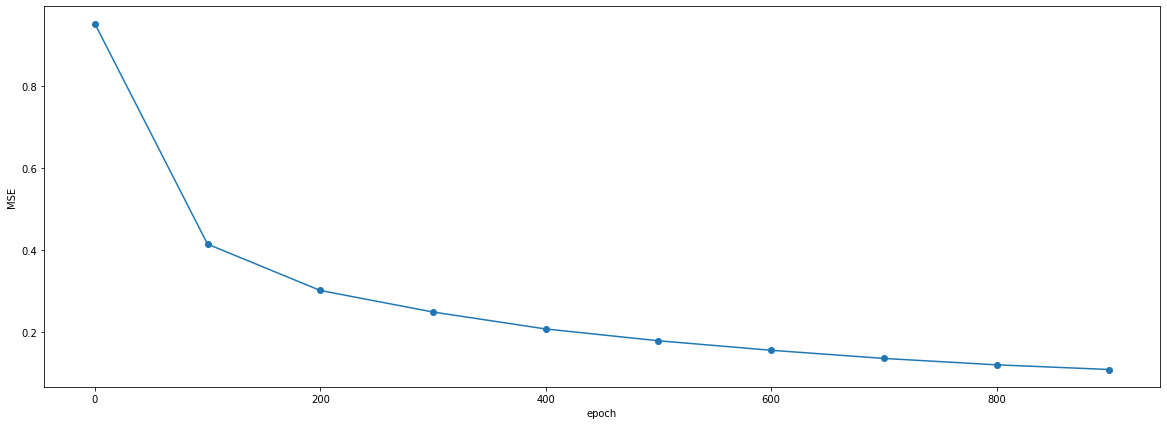

In [18]:
plt.figure(figsize=(20,7))
plt.plot(np.arange(len(losses)) * 100 ,losses,'-o')
plt.xlabel('epoch')
plt.ylabel('MSE')
plt.show()

# Pytorch 內建建模函數

In [19]:
input_size = X.shape[1]
hidden_size = 10
output_size = 1
batch_size = 128
neu = torch.nn.Sequential(
    torch.nn.Linear(input_size,hidden_size),
    torch.nn.Sigmoid(),
    torch.nn.Linear(hidden_size,output_size)
)
cost = torch.nn.MSELoss()
optimizer = torch.optim.SGD(neu.parameters(),lr = 0.01)

In [20]:
losses = []
for i in range(1000):
    batch_loss = []
    for st in range(0,len(X),batch_size):
        et= st + batch_size if st + batch_size < len(X) else len(X)
        xx = torch.tensor(X[st:et],dtype=torch.float,requires_grad=True)
        yy = torch.tensor(Y[st:et],dtype=torch.float,requires_grad=True)
        prediction = neu(xx)
        loss = cost(prediction,yy)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        batch_loss.append(loss.data.numpy())
    if i % 100 == 0:
        losses.append(np.mean(batch_loss))
        print(i,np.mean(batch_loss))

0 0.89820987
100 0.27011165
200 0.2416395
300 0.15559317
400 0.0985715
500 0.0805619
600 0.074376844
700 0.07052883
800 0.06726902
900 0.06449617


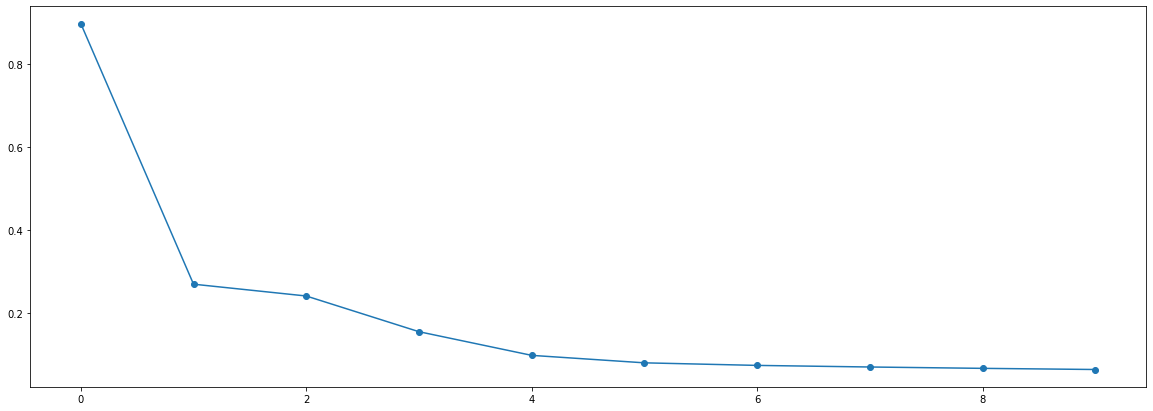

In [21]:
plt.figure(figsize=(20,7))
plt.plot(losses,'-o')
plt.show()

# 測試

In [22]:
targets = test_targets['cnt']
targets = targets.values.reshape([len(targets),1])
targets = targets.astype(float)

In [23]:
x = torch.tensor(test_features.values,dtype=torch.float,requires_grad=True)
y = torch.tensor(targets,dtype=torch.float,requires_grad=True)
predict = neu(x)
predict = predict.data.numpy()
print((predict * std + mean)[:10])

[[159.5547  ]
 [ 99.519585]
 [  4.975403]
 [ 26.930191]
 [ 25.045517]
 [ -1.02211 ]
 [ 26.805984]
 [ 10.604416]
 [153.27567 ]
 [431.08636 ]]


In [24]:
rides.loc[test_data.index]['dteday']

16875    2012-12-10
16876    2012-12-10
16877    2012-12-11
16878    2012-12-11
16879    2012-12-11
            ...    
17374    2012-12-31
17375    2012-12-31
17376    2012-12-31
17377    2012-12-31
17378    2012-12-31
Name: dteday, Length: 504, dtype: object

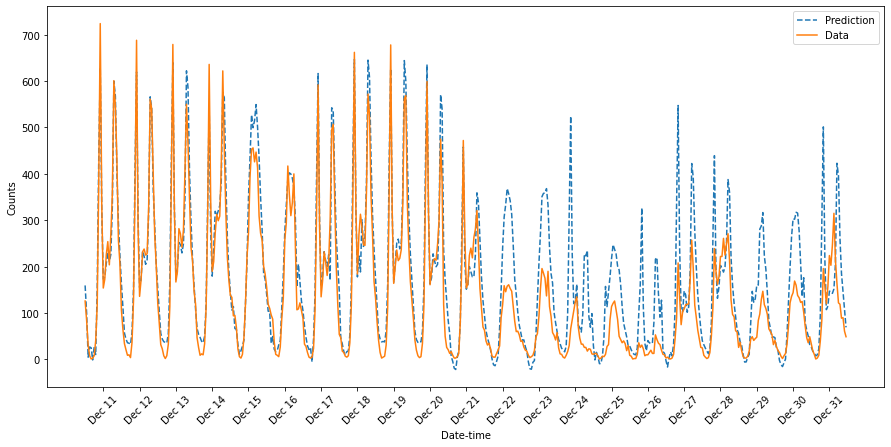

In [26]:
fig, ax = plt.subplots(figsize = (15, 7))

mean, std = scaled_features['cnt']
ax.plot(predict * std + mean, label='Prediction', linestyle = '--')
ax.plot(targets * std + mean, label='Data', linestyle = '-')
ax.legend()
ax.set_xlabel('Date-time')
ax.set_ylabel('Counts')
# 对横坐标轴进行标注
dates = pd.to_datetime(rides.loc[test_data.index]['dteday'])
dates = dates.apply(lambda d: d.strftime('%b %d'))
# dates = data.loc[test_data.index]['dteday']
ax.set_xticks(np.arange(len(dates))[12::24])
_ = ax.set_xticklabels(dates[12::24], rotation=45)

# 剖析

In [27]:
bool1 = rides['dteday'] == '2012-12-22'
bool2 = rides['dteday'] == '2012-12-23'
bool3 = rides['dteday'] == '2012-12-24'
bool = [any(tup) for tup in zip(bool1,bool2,bool3)]
subset = test_features.loc[rides[bool].index]
subtargets = test_targets.loc[rides[bool].index]
subtargets = subtargets['cnt']
subtargets = subtargets.values.reshape([len(subtargets),1])

def feature(X,net):
    X = torch.tensor(X, dtype = torch.float, requires_grad=True)
    dic = dict(neu.named_parameters())
    weights = dic['0.weight']
    biases = dic['0.bias']
    h = torch.sigmoid(X.mm(weights.t()) + biases.expand([len(X),len(biases)]))
    return h

results = feature(subset.values,neu).data.numpy()
prediction = neu(torch.tensor(subset.values,dtype=torch.float,requires_grad=True)).data.numpy()

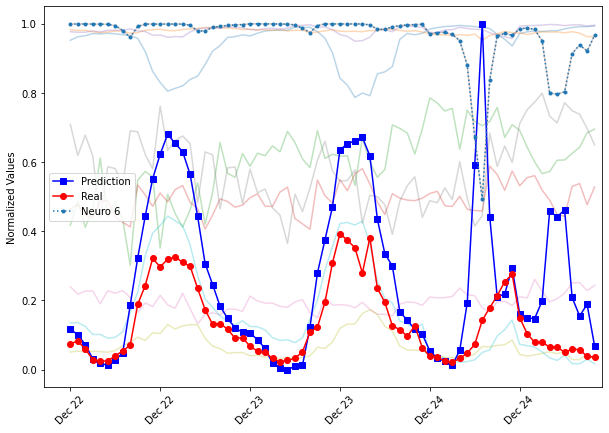

In [134]:
mean, std = scaled_features['cnt']
predict = prediction * std + mean
subtarget = subtargets * std + mean
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(results[:,:],alpha = 0.3)
ax.plot((predict - min(predict)) / (max(predict) - min(predict)),'bs-',label='Prediction')
ax.plot((subtarget - min(predict)) / (max(predict) - min(predict)),'ro-',label='Real')
ax.plot(results[:,5],'.:',alpha = 1,label = "Neuro 6")
ax.set_xlim(right=len(predict))
ax.legend()
plt.ylabel('Normalized Values')
date = pd.to_datetime(rides.loc[subset.index]['dteday'])
date = date.apply(lambda x : x.strftime('%b %d'))
ax.set_xticks(np.arange(len(date))[0::12])
_ = ax.set_xticklabels(date[0::12],rotation = 45)

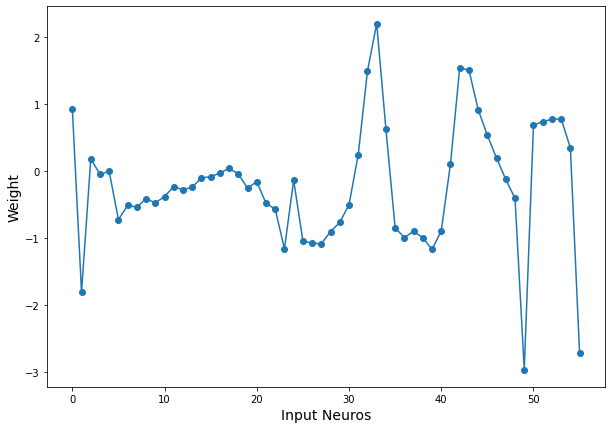

In [28]:
dic = dict(neu.named_parameters())
dic['0.weight'][9]
plt.figure(figsize=(10,7))
plt.plot(dic['0.weight'][5].data.numpy(),'-o')
plt.xlabel('Input Neuros',fontsize=14)
plt.ylabel('Weight',fontsize=14)
plt.show()

In [29]:
print(test_features.columns)

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_1', 'season_2',
       'season_3', 'season_4', 'mnth_1', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weathersit_1', 'weathersit_2', 'weathersit_3',
       'weathersit_4', 'hr_0', 'hr_1', 'hr_2', 'hr_3', 'hr_4', 'hr_5', 'hr_6',
       'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12', 'hr_13', 'hr_14',
       'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20', 'hr_21', 'hr_22',
       'hr_23', 'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6'],
      dtype='object')


# 2元分類（交叉熵）

In [114]:
input_size = train_features.shape[1]
hidden_size = 128
output_size = 2
batch_size = 128
neuc = torch.nn.Sequential(
    torch.nn.Linear(input_size,hidden_size),
    torch.nn.Sigmoid(),
    torch.nn.Linear(hidden_size,output_size),
    torch.nn.Sigmoid()
)
cost = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(neuc.parameters(),lr = 0.9,momentum=0.9)

In [115]:
Y = train_targets['cnt'].values
Y = Y.reshape([len(Y),-1])
Y_label = Y > np.mean(Y)
Y_label = Y_label.astype(int)
Y_labels = Y_label.reshape(-1)
Y_labels

array([0, 0, 0, ..., 1, 1, 1])

In [116]:
neuc(torch.tensor(X[0],dtype=torch.float,requires_grad=True))

tensor([0.5369, 0.4239], grad_fn=<SigmoidBackward0>)

In [117]:
# 定義一個專門計算分類錯誤率的函數，它的基本思想是，對於預測向量predictions的每一行，
# 取最大的那個元素的下標，與標簽labels中的元素做比較
def error_rate(predictions, labels):
    """計算預測錯誤率的函數，其中predictions是模型給出的一組預測結果，labels是數據之中的正確答案"""
    predictions = np.argmax(predictions, 1)
    return 100.0 - (
      100.0 *
      np.sum( predictions == labels) /
      predictions.shape[0])

# 神經網路訓練循環
losses = []
errors = []
for i in range(4000):
    # 每128個樣本點被劃分為一個撮
    batch_loss = []
    batch_errors = []
    for start, end in zip(range(0, len(X), batch_size), range(batch_size, len(X)+1, batch_size)):
        xx = torch.tensor(X[start:end], dtype = torch.float, requires_grad = True)
        yy = torch.tensor(Y_labels[start:end], dtype = torch.long)
        predict = neuc(xx)
        loss = cost(predict, yy)
        err = error_rate(predict.data.numpy(), yy.data.numpy())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        batch_loss.append(loss.data.numpy())
        batch_errors.append(err)
    
    # 每隔100步輸出一下損失值（loss）
    if i % 100==0:
        losses.append(np.mean(batch_loss))
        errors.append(np.mean(batch_errors))
        print(i, np.mean(batch_loss), np.mean(batch_errors))

0 0.7145122 39.87356870229008
100 0.71199733 39.87356870229008
200 0.71199733 39.87356870229008
300 0.71199733 39.87356870229008
400 0.71199733 39.87356870229008
500 0.71199733 39.87356870229008
600 0.71199733 39.87356870229008
700 0.71199733 39.87356870229008
800 0.71199733 39.87356870229008
900 0.71199733 39.87356870229008
1000 0.71199733 39.87356870229008
1100 0.71199733 39.87356870229008
1200 0.71199733 39.87356870229008
1300 0.71199733 39.87356870229008
1400 0.71199733 39.87356870229008
1500 0.71199733 39.87356870229008
1600 0.71199733 39.87356870229008
1700 0.71199733 39.87356870229008
1800 0.71199733 39.87356870229008
1900 0.71199733 39.87356870229008
2000 0.71199733 39.87356870229008
2100 0.71199733 39.87356870229008
2200 0.71199733 39.87356870229008
2300 0.71199733 39.87356870229008
2400 0.71199733 39.87356870229008
2500 0.71199733 39.87356870229008
2600 0.71199733 39.87356870229008
2700 0.71199733 39.87356870229008
2800 0.71199733 39.87356870229008
2900 0.71199733 39.87356870

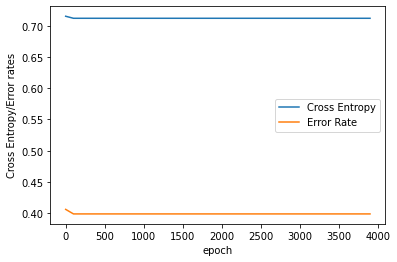

In [104]:
# 列印輸出損失值
plt.plot(np.arange(len(losses))*100,losses, label = 'Cross Entropy')
plt.plot(np.arange(len(losses))*100, np.array(errors) / float(100), label = 'Error Rate')
plt.xlabel('epoch')
plt.ylabel('Cross Entropy/Error rates')
plt.legend()

29.365079365079367


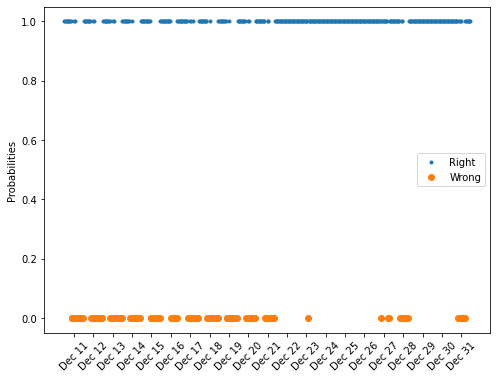

In [105]:
# 讀取測試數據
targets = test_targets['cnt']
targets = targets.values.reshape([len(targets), 1])
Y_labels = targets > np.mean(Y)
Y_labels = Y_labels.astype(int)
Y_labels = Y_labels.reshape(-1)
x = torch.tensor(test_features.values, dtype = torch.float, requires_grad = True)

# 列印神經網路預測的錯誤率
predict = neuc(x)
print(error_rate(predict.data.numpy(), Y_labels))

# 接下來，我們把預測正確的數據和錯誤的數據分別畫出來，縱坐標分別是預測正確的機率和預測錯誤的機率
prob = predict.data.numpy()
rights = np.argmax(prob, 1) == Y_labels
wrongs = np.argmax(prob, 1) != Y_labels
right_labels = Y_labels[rights]
wrong_labels = Y_labels[wrongs]
probs = prob[rights, :]
probs1 = prob[wrongs, :]
rightness = [probs[i, right_labels[i]] for i in range(len(right_labels))]
right_index = np.arange(len(targets))[rights]
wrongness = [probs1[i, wrong_labels[i]] for i in range(len(wrong_labels))]
wrong_index = np.arange(len(targets))[wrongs]
fig, ax = plt.subplots(figsize = (8, 6))
ax.plot(right_index, rightness, '.', label='Right')
ax.plot(wrong_index, wrongness,'o',label='Wrong')

ax.legend()
plt.ylabel('Probabilities')

dates = pd.to_datetime(rides.loc[test_features.index]['dteday'])
dates = dates.apply(lambda d: d.strftime('%b %d'))
ax.set_xticks(np.arange(len(dates))[12::24])
_ = ax.set_xticklabels(dates[12::24], rotation=45)